# Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

# Import necessary Python Modules¶

In [141]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
	

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

In [142]:
#loadindg the data set
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
#print first 5 rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [143]:
#Data Summary
df.shape

(614, 13)

In [144]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [145]:
#There are null values in Credit_History (50) , Self_Employed (32) ,LoanAmount (22) ,Dependents (15), Loan_Amount_Term (14) , Gender (13) & Married (3)
#The features which have null value for all the rows shall be dropped
#let us first describe the entire list of features and their details
#we shall treat null values once we evaluate the value counts of each feature.

In [146]:
#find duplicates
df.duplicated().sum()

0

In [147]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Property_Area         object
Loan_Status           object
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
ApplicantIncome        int64
dtype: object

In [148]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of Loan_ID 

LP001819    1
LP002187    1
LP002536    1
LP001046    1
LP002051    1
LP001392    1
LP002534    1
LP002587    1
LP001029    1
LP002138    1
LP001003    1
LP001401    1
LP002933    1
LP001726    1
LP002097    1
LP002911    1
LP002515    1
LP002916    1
LP002640    1
LP001639    1
LP002190    1
LP002114    1
LP002753    1
LP001350    1
LP002893    1
LP002272    1
LP002706    1
LP002453    1
LP001422    1
LP002234    1
LP001327    1
LP002332    1
LP002100    1
LP001310    1
LP002755    1
LP002472    1
LP001345    1
LP002067    1
LP002161    1
LP001688    1
LP002448    1
LP002131    1
LP001698    1
LP002478    1
LP001938    1
LP002784    1
LP001116    1
LP001531    1
LP002366    1
LP001945    1
LP001907    1
LP002140    1
LP001664    1
LP002978    1
LP001151    1
LP001018    1
LP002361    1
LP001657    1
LP001892    1
LP002692    1
LP001319    1
LP001038    1
LP002113    1
LP002683    1
LP002377    1
LP002086

<AxesSubplot:ylabel='Loan_Status'>

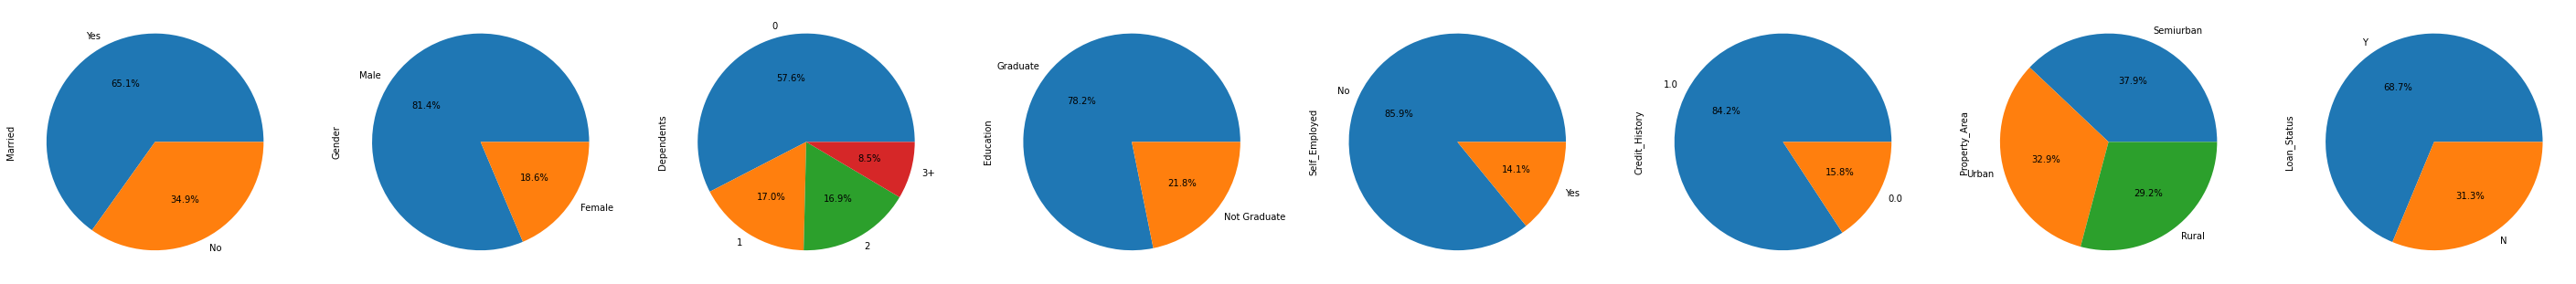

In [149]:
plt.figure(figsize=(50,25))
plt.subplot(1,8,1)
df['Married'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,8,2)
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,8,3)
df['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,8,4)
df['Education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,8,5)
df['Self_Employed'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,8,6)
df['Credit_History'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,8,7)
df['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,8,8)
df['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%')



# Dropping Unnecessary Columns

1) Loan_ID (OBJECT DATATYPE)
This is just an indicitor indicating the ID of the application, 
Hence, we shall drop this feature

In [150]:
df=df.drop(columns = ['Loan_ID'])

In [151]:
df = df.reset_index()
df = df.drop(columns = 'index')

In [152]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# ENCODING

In [153]:
#For Dependents feature too we will encode it, as for 0-2 & 3+ values it will encode it to 0-3 itself.

In [154]:
from sklearn.preprocessing import LabelEncoder
for col_name in df.columns:
    series = df[col_name]
    label_encoder = LabelEncoder()
    df[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )

In [155]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

Gender               float64
Married              float64
Dependents           float64
Self_Employed        float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
ApplicantIncome        int64
CoapplicantIncome      int64
Education              int32
Property_Area          int32
Loan_Status            int32
dtype: object

In [156]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of Gender 

1.0    489
0.0    112
Name: Gender, dtype: int64
*******************************************************
*******************************************************
Value counts of Married 

1.0    398
0.0    213
Name: Married, dtype: int64
*******************************************************
*******************************************************
Value counts of Dependents 

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64
*******************************************************
*******************************************************
Value counts of Education 

0    480
1    134
Name: Education, dtype: int64
*******************************************************
*******************************************************
Value counts of Self_Employed 

0.0    500
1.0     82
Name: Self_Employed, dtype: int64
*******************************************************
**********************

In [157]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [158]:
cont_data = ['LoanAmount']
cat_data = ['Dependents', 'Gender', 'Married', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']

In [159]:
#imputing continous data
#KNN IMPUTER
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=3)
for i in cont_data:
    df[i] = pd.DataFrame(knnimp.fit_transform(df[[i]]))

In [160]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Property_Area         0
Loan_Status           0
dtype: int64

In [161]:
#imputing categorical data
#Simple Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NaN, strategy='most_frequent')
for i in cat_data:    
    df[i] = imputer.fit_transform(df[i].values.reshape(-1,1))[:,0] 

In [162]:
df['Married'].value_counts()

1.0    401
0.0    213
Name: Married, dtype: int64

In [163]:
df.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [164]:
#we will describe method on the continour columns, lets note down the continous columns 
cont_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [165]:
#lets check the statistical description of the each column
df[cont_col].describe(include='all')

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,247.117264,78.884365,86.908784
std,143.537853,92.623999,45.218431
min,0.000000,0.000000,0.000000
25%,120.250000,0.000000,53.250000
50%,244.500000,33.500000,82.000000
75%,369.750000,153.750000,115.750000
max,504.000000,286.000000,202.000000


In [166]:
#all the features do not contain any null value. 
# as per the thumb rule mean>std, CoapplicantIncome fail in this; Hence, these two have major skewness

1    422
0    192
Name: Loan_Status, dtype: int64


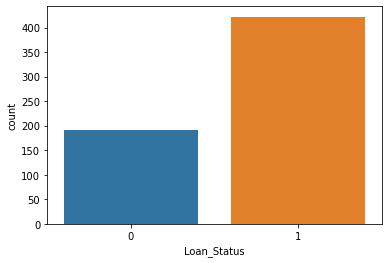

In [167]:
#count of each class (Attrition(1) = 237, NoAttrition(0)=1233)
ax=sns.countplot(x="Loan_Status", data=df)
print(df['Loan_Status'].value_counts())

In [168]:
#There is a problem of class imbalance here and hence we would have to either do upsampling or downsampling depending on the size of the dataset.

#Since the amount of upsampling needed would be around '3 times' we would be better doing downsampling to avoid any foreign data or unwanted data.

# We will peform downsampling at a later stage

<AxesSubplot:>

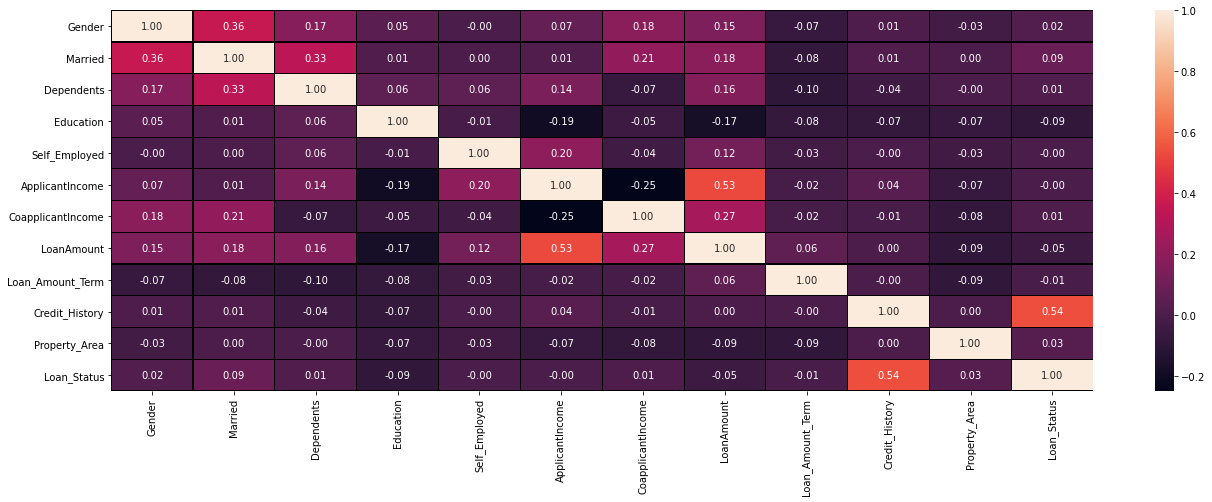

In [169]:
#Correlation using HEATMAP
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [170]:
#Correlation with the target column
corr_mat=np.abs(df.corr())
corr_mat['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Education            0.085884
LoanAmount           0.045449
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
CoapplicantIncome    0.007812
Loan_Amount_Term     0.005679
Self_Employed        0.003700
ApplicantIncome      0.003123
Name: Loan_Status, dtype: float64

In [171]:
#As per the above details, there is no feature which has high correlation with the target column.
#Also, there is no major correlaton among the features 

# DIVIDE DATA INTO FEATURES & LABEL

In [172]:
#diving the columns in feature and label
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# DATA VISUALIZATION

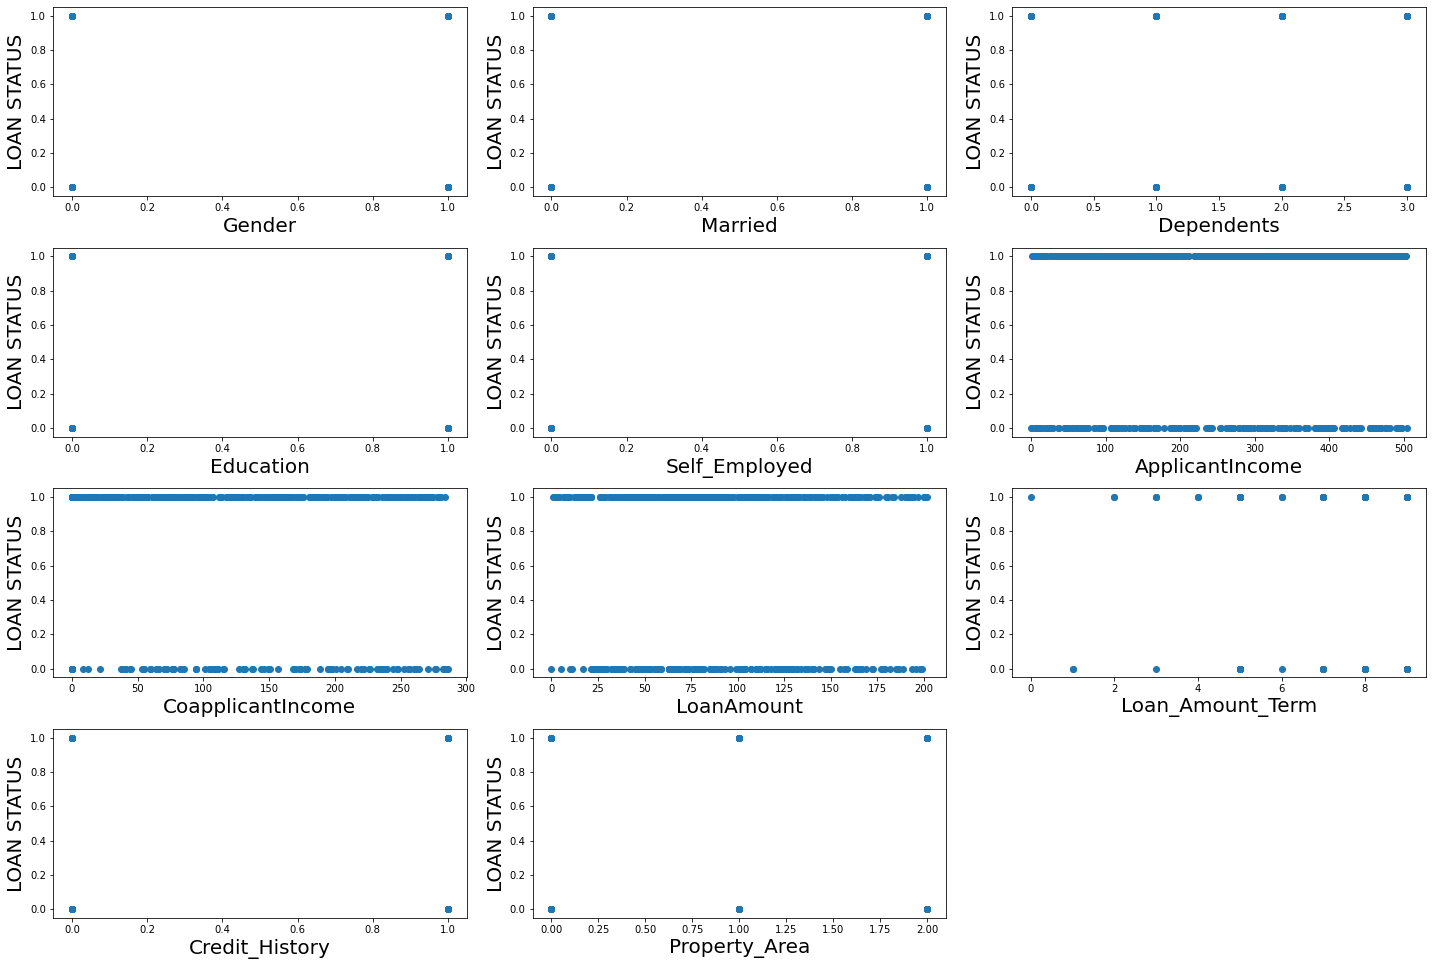

In [173]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
	if plotnumber<=30: 
		ax=plt.subplot(10,3,plotnumber)
		plt.scatter(X[column],y)
		plt.xlabel(column,fontsize=20)
		plt.ylabel('LOAN STATUS', fontsize=20)
	plotnumber+=1
plt.tight_layout()

In [ ]:
#All the features are equally related to both the classes.

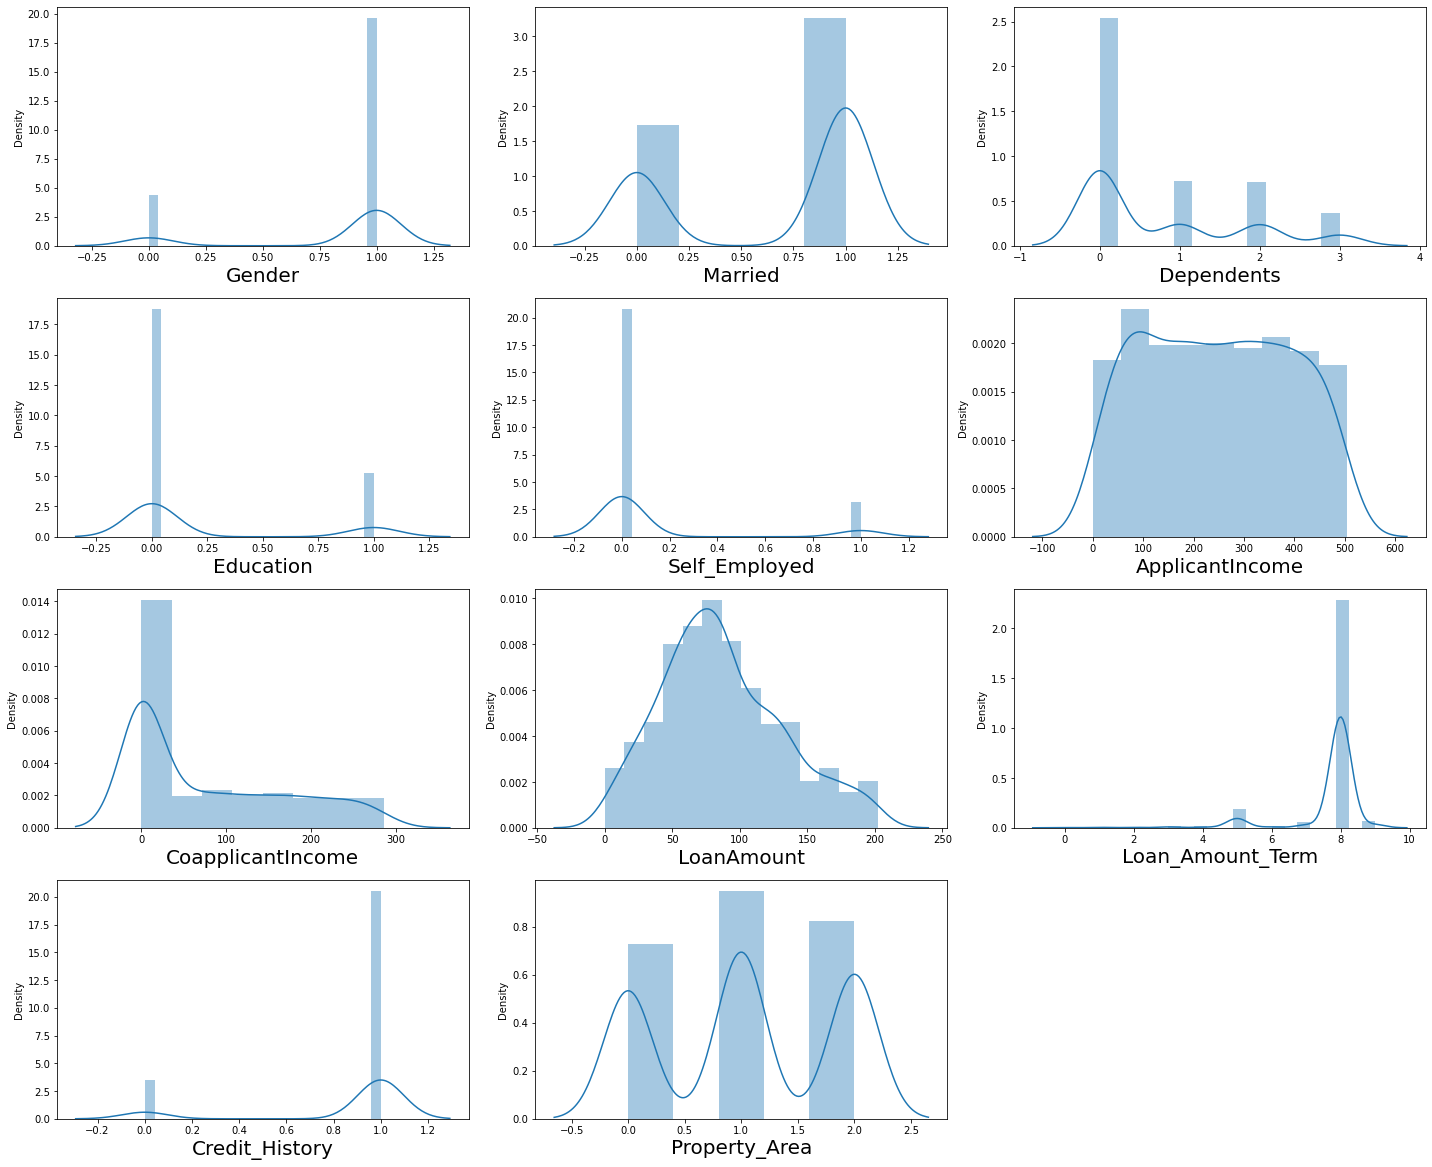

In [174]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [ ]:
#CoapplicantIncome is right skewed.
#ApplicantIncome is skewed

In [175]:
#Checking skewness of the features
X.skew().sort_values(ascending=False)

Self_Employed        2.159796
Education            1.367622
Dependents           1.015551
CoapplicantIncome    0.780870
LoanAmount           0.487758
ApplicantIncome      0.040993
Property_Area       -0.066196
Married             -0.644850
Gender              -1.648795
Credit_History      -2.021971
Loan_Amount_Term    -3.316702
dtype: float64

In [177]:
#We can see skewness in few of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
X_new = power_transform(X)
X=pd.DataFrame(X_new,columns=X.columns)
X.skew().sort_values(ascending=False) #validating that the skewness is removed

Self_Employed        2.159796
Education            1.367622
Loan_Amount_Term     0.616483
Dependents           0.377295
CoapplicantIncome   -0.022934
LoanAmount          -0.023752
Property_Area       -0.041074
ApplicantIncome     -0.047884
Married             -0.644850
Gender              -1.648795
Credit_History      -2.021971
dtype: float64

In [ ]:
#Education & Self_Employed are both categorical columns and hence their skewness is not a real threat to our prediction

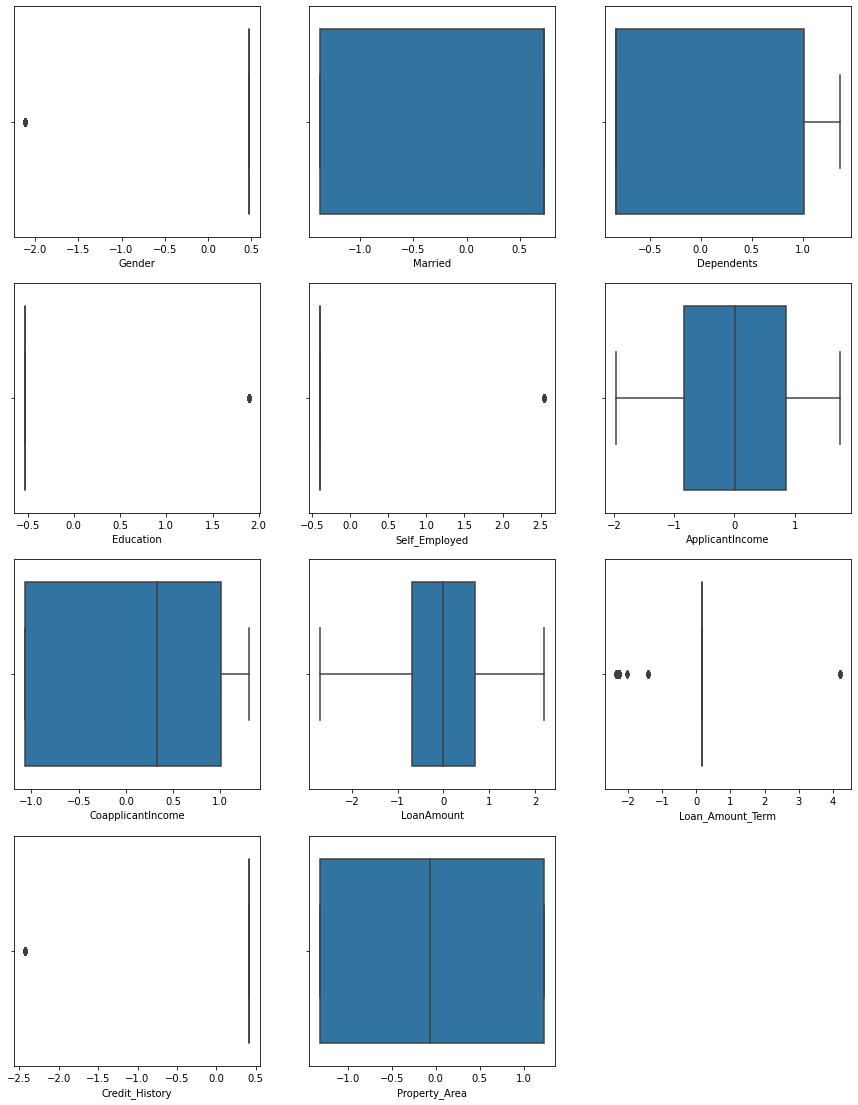

In [178]:
#Visualizing the outliers using BOXPLOT

plt.figure(figsize=(15,50))
graph=1

for column in X:
	if graph<=30: 
		ax=plt.subplot(10,3,graph)
		sns.boxplot(X[column],orient='v')
		plt.xlabel(column,fontsize=10)
	graph+=1
plt.show()

In [ ]:
#There does not seem to be any major outliers either in the dataset

In [179]:
#Data Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [180]:
#Finding best random_state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0 #maximum accuracy
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(1,200):
	x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
	LR = LogisticRegression()
	LR.fit(x_train,y_train)
	predrf=LR.predict(x_test)
	acc=accuracy_score(y_test,predrf)
	if acc>maxAccu:
		maxAccu=acc
		maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.8861788617886179 on Random State 8


In [181]:
#CREATING TRAIN-TEST SPLIT
x_train_imb, x_test, y_train_imb, y_test =  train_test_split(X, y, test_size=0.20, random_state=8)

In [182]:
print(x_train_imb.shape)
print(y_train_imb.shape)
print(x_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


# USING SMOTE FOR DOWN-SAMPLING

1    422
0    192
Name: Loan_Status, dtype: int64


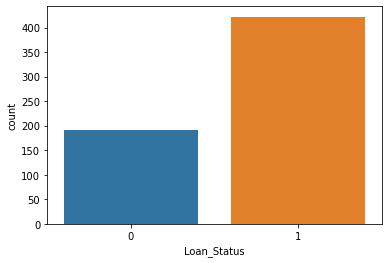

In [184]:
#count of each class (Attrition(1) = 237, NoAttrition(0)=1233)
ax=sns.countplot(x="Loan_Status", data=df)
print(df['Loan_Status'].value_counts())

In [185]:
# We will be doing down sampling of the target column which has imblanced class

In [186]:
#USING SMOTE FOR DOWN-SAMPLING

In [187]:
print(y_train_imb.value_counts())

1    332
0    159
Name: Loan_Status, dtype: int64


In [188]:
#y_train has 159 entries of class 0 and only 332 entries of class 1

In [189]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler()
down_smp=RandomUnderSampler(0.99)
x_train_ns,y_train_ns=down_smp.fit_sample(x_train_imb,y_train_imb)
from collections import Counter
print('The no of samples before fit()', format(Counter(y_train_imb)))
print('The no of samples after fit()', format(Counter(y_train_ns)))

The no of samples before fit() Counter({1: 332, 0: 159})
The no of samples after fit() Counter({1: 160, 0: 159})


In [190]:
print(y_train_ns.value_counts())

1    160
0    159
Name: Loan_Status, dtype: int64


In [191]:
#Now both the classes have 160 and 159 entries and hence we have a balanced class in our training data.

In [192]:
# Using shallow copy or deep copy
import copy
x_train = copy.copy(x_train_ns)
y_train = copy.copy(y_train_ns)

In [193]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(319, 11)
(319,)
(123, 11)
(123,)


# APPLYING CLASSIFICATION MODELS & FINDING BEST FIT MODEL

In [194]:
results = pd.DataFrame()
model_name=[]
accuracy=[]
cvs=[]

In [195]:
#LOGISTIC REGRESSION
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy_LR = accuracy_score(y_test,y_pred)*100
scr = cross_val_score(LR,X,y,cv=5)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
model_name.append("Logistic Regression")
accuracy.append(accuracy_LR)
cvs.append(scr.mean())

[[22 11]
 [ 3 87]]
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        33
           1       0.89      0.97      0.93        90

    accuracy                           0.89       123
   macro avg       0.88      0.82      0.84       123
weighted avg       0.89      0.89      0.88       123



In [196]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)*100
scr2 = cross_val_score(dt,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
model_name.append("Decistion Tree Classifier")
accuracy.append(accuracy_dt)
cvs.append(scr2.mean())

[[27  6]
 [37 53]]
              precision    recall  f1-score   support

           0       0.42      0.82      0.56        33
           1       0.90      0.59      0.71        90

    accuracy                           0.65       123
   macro avg       0.66      0.70      0.63       123
weighted avg       0.77      0.65      0.67       123



In [197]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)*100
scr3 = cross_val_score(rf,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
model_name.append("Random Forest Classifier")
accuracy.append(accuracy_rf)
cvs.append(scr3.mean())

[[22 11]
 [11 79]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        33
           1       0.88      0.88      0.88        90

    accuracy                           0.82       123
   macro avg       0.77      0.77      0.77       123
weighted avg       0.82      0.82      0.82       123



In [198]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_pred_svc)*100
scr4 = cross_val_score(svc,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
model_name.append("SVC")
accuracy.append(accuracy_svc)
cvs.append(scr4.mean())

[[21 12]
 [11 79]]
              precision    recall  f1-score   support

           0       0.66      0.64      0.65        33
           1       0.87      0.88      0.87        90

    accuracy                           0.81       123
   macro avg       0.76      0.76      0.76       123
weighted avg       0.81      0.81      0.81       123



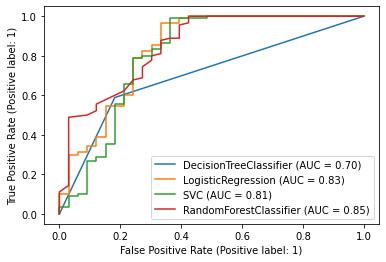

In [201]:
#PLOT THE ROC AUC CURVE
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.show()

In [202]:
results['Model Name'] = model_name
results['Accuracy'] = accuracy
results['Cross Value Score'] = cvs
results['ROC AUC'] = ['0.83', '0.70', '0.85', '0.81']
results

,Model Name,Accuracy,Cross Value Score,ROC AUC
0,Logistic Regression,88.617886,0.807837,0.83
1,Decistion Tree Classifier,65.040650,0.723177,0.70
2,Random Forest Classifier,82.113821,0.783420,0.85
3,SVC,81.300813,0.811089,0.81


In [ ]:
#As per the results of the ROC AUC Curve, Random Forest Classifier is giving the best accuracy.

In [200]:
#Lets try to improve the accuracy score by using GridSearchCV over RF classifier

In [203]:
#Let's tune the parameter using GridSearchCV
#RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=41)
clf= RandomForestClassifier()
params = { 'n_estimators': [13,15],
			'criterion': ['entropy', 'gini'],
			'max_depth': [10,15],
			'min_samples_split':[10,11],
			'min_samples_leaf':[5,6]
		}
grid=GridSearchCV(clf,param_grid=params)
grid.fit(x_train,y_train)
print('best_params=>', grid.best_params_)
clf=grid.best_estimator_
clf.fit(x_train,y_train)
y_pred_gscv=clf.predict(x_test)
rf_conf_mat=confusion_matrix(y_test,y_pred_gscv)
print('\n Conf Mat =>''\n', rf_conf_mat)
print('\n' ' Accuracy rf Normal =>', accuracy_score(y_test,y_pred_gscv))

report = classification_report(y_test,y_pred_gscv)
print(report)

best_params=> {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 13}

 Conf Mat =>
 [[ 27  37]
 [  1 120]]

 Accuracy rf Normal => 0.7945945945945946
              precision    recall  f1-score   support

           0       0.96      0.42      0.59        64
           1       0.76      0.99      0.86       121

    accuracy                           0.79       185
   macro avg       0.86      0.71      0.73       185
weighted avg       0.83      0.79      0.77       185



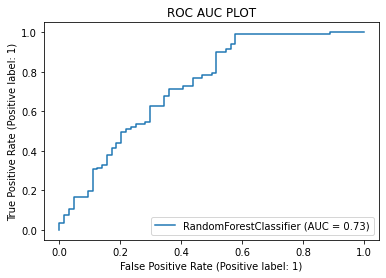

In [204]:
#ROC AUC PLOT
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,x_test,y_test)
plt.title("ROC AUC PLOT")
plt.show()

# SAVE THE MODEL

In [205]:
import joblib
joblib.dump(clf,'Loan_Application_Status.obj')

['Loan_Application_Status.obj']